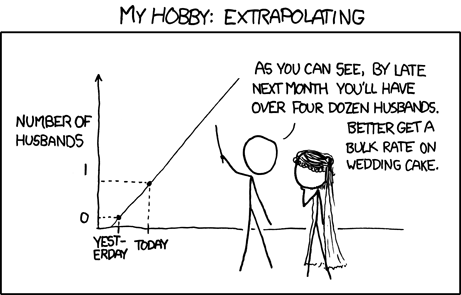

# 1. Linear Regression

## 1.1. Introduction

<p style="line-height:1.75;font-size:16px">
Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning. It is a linear model, e.g. a model that assumes a linear relationship between the input variables $\mathbf x$ and the single output variable $\mathbf y$. More specifically, that $\mathbf y$ can be calculated from a linear combination of the input variables $\mathbf x$.<br>
In its basic form, with only one input variable, a <b>simple linear regression</b> model can be written as:<br>
<center><h3>
$y=\beta_0 + \beta_1x$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
where $\beta_1$ is the coefficient for the input $\mathbf x$ and $\beta_0$ is the intercept (or bias). An example of a simple linear regression model could be a model that given a person's height ($\mathbf x$) attempts to predict his weight ($\mathbf y$).<br>
A more complex model, that receives several input variables, is known as a <b>multiple linear regression</b> model:<br>
<center><h3>
$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
where $\beta_1$ is the coefficient for the input $\mathbf x_1$, $\beta_2$ is the coefficient for the input $\mathbf x_2$ and so forth, and $\beta_0$ is the intercept (or bias). An example of a multiple linear regression model could be a model that receives a person's height, age and weight and tries to predict his life expectancy.<br>

Our goal is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) is as small as possible.
</p>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
%matplotlib inline

X, y = make_regression(n_samples=50, n_features=1, noise=20)

def plot_line(a, b=10):
    fig = plt.figure(figsize=(15,8))
    ax = fig.gca()
    plt.xlim(-3,5)
    plt.ylim(-200, 200)
    plt.plot(X, y, '.')

    x_vals = np.linspace(-3, 5, 100)
    y_vals = [a*x + b for x in x_vals]
    ax.plot(x_vals, y_vals, c='r')
    plt.show()
    
interact(plot_line, a=(-100,100,5), b=(-200,200,5))

A Jupyter Widget

<function __main__.plot_line>

## 1.2. Loss Function

<p style="line-height:1.75;font-size:16px">
A loss function is a function that maps the values of one or more variables onto a real number associated with the cost of those variables being set with these values. You can think of the loss function as a function that measures the error of our model compared to the actual values (ground truth).

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
How do we measure the error of our model? (recall, we are interested in finding a line that best fits the data).
</p></div>

<p style="line-height:1.75;font-size:16px">
We measure the difference between the actual value of the dependent variable and the value predicted by the model. This is known as the <b>residual</b> and it can be written as:
</p><p><center><h3>
$r_i=y_i - \hat{y_i} = y_i - (\beta_0 + \beta_1x_i)$
</h3>
<p style="line-height:1.75;font-size:16px">
Now that we have our residual we can write our loss function. However, we usually square the residual first (why?):<br>
</p><p><center><h3>
$Loss_1=(y_i - \hat{y_i})^2$
</h3>
<p style="line-height:1.75;font-size:16px">
Instead of squaring the residual, we could choose to simplt take its absolute value:<br>
</p>
<p><center><h3>
$Loss_2=\left|y_i - \hat{y_i}\right|$
</h3>

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
But that only gives us the error for a single datapoint, how do we measure the overall error?
</p></div>

<p style="line-height:1.75;font-size:16px">
The mean of the loss function values across all of our data is called the <b>cost function</b> (<u>note</u>: the loss function and cost function are sometimes used interchangeably). The cost function that uses the squared residual ($Loss_1$) is called the <b>Mean Squared Error.</b><br>
</p><p><center><h3>
$MSE=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2$
</h3>
<p style="line-height:1.75;font-size:16px">
Since we've squared the errors, the result of the MSE is no longer in the same units as before. It is therefore more common to use the <b>Root Mean Squared Error</b> rather than the MSE:
</p><p><center><h3>
$RMSE=\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$
</h3>
<p style="line-height:1.75;font-size:16px">
The cost function that uses the absolute residual ($Loss_2$) is called the <b>Mean Absolute Error.</b><br>
</p><p><center><h3>
$MAE=\frac{1}{n}\sum\limits_{i=1}^{n}\left|y_i - \hat{y_i}\right|$
</h3>
<p style="line-height:1.75;font-size:16px">



<p style="line-height:1.75;font-size:16px">
The method of squaring the residuals, summing them and minimizing the sum is known as <b>least squares</b>.
There are other cost functions for regression but RMSE is the one most commonly used.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Choosing A Cost Function</b></span><br>
Although RMSE is the go to option for a regression cost function, there are legitimate cases where you would choose a different one. MAE for example, is better when it comes to handling outliers but it has a constant gradient which is bad for certain algorithms (more on that later in the course). RMSE on the other hand is better when making a large error is much worse than making a small one. As stated, there are other loss functions that are more suitable for certain scenarios but that is beyond our scope. You can read about this topic in <a href=https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0>this post</a>. 
</p></div>

## 1.3. Regression Sample Problem

<p style="line-height:1.75;font-size:16px">
Now that we know the basics of how linear regression works, let's try to solve a sample problem end-to-end. We have a data set composed of the gender, height and weight of a person. We will build a linear regression model that predicts a person's weight based on his height. We'll start by exploring the data and drawing some plots to get a better feel for it.
</p>

### 1.3.1. Exploration

In [2]:
import pandas as pd

data = pd.read_csv('data/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<p style="line-height:1.75;font-size:16px">
Looks like the data is given in inches/pounds - let's convert it to centimeters/kilograms

In [3]:
inch_to_cm = 2.54
pound_to_kg = 0.453592

data['Height'] *= inch_to_cm
data['Weight'] *= pound_to_kg

data.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

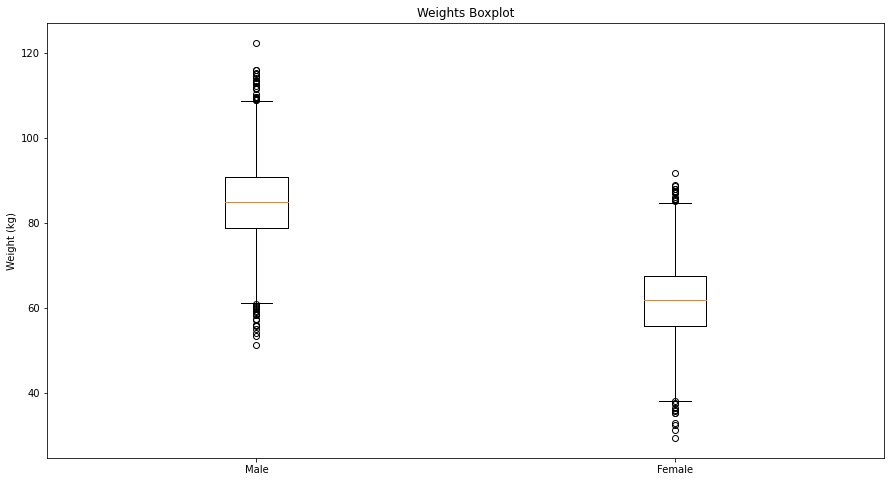

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
ax.boxplot([data[data['Gender'] == 'Male']['Weight'], data[data['Gender'] == 'Female']['Weight']], labels=['Male', 'Female'])
ax.set_title('Weights Boxplot')
ax.set_ylabel('Weight (kg)')
plt.show()

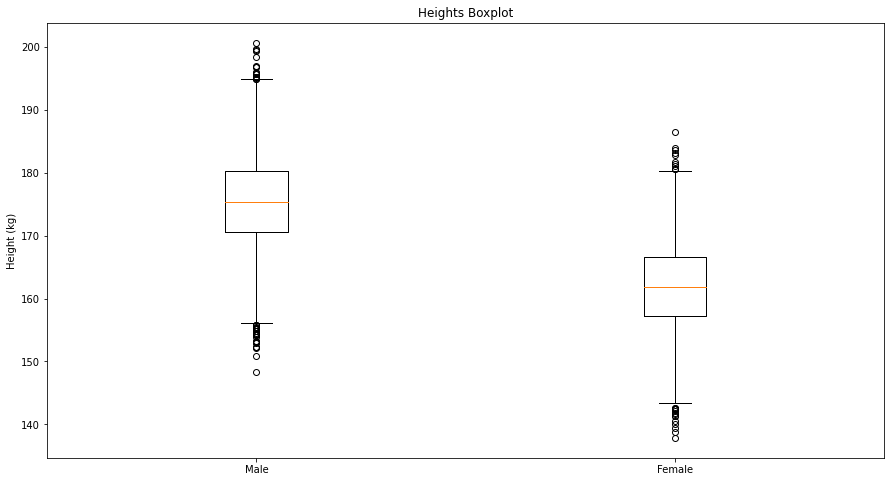

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
ax.boxplot([data[data['Gender'] == 'Male']['Height'], data[data['Gender'] == 'Female']['Height']], labels=['Male', 'Female'])
ax.set_title('Heights Boxplot')
ax.set_ylabel('Height (kg)')
plt.show()

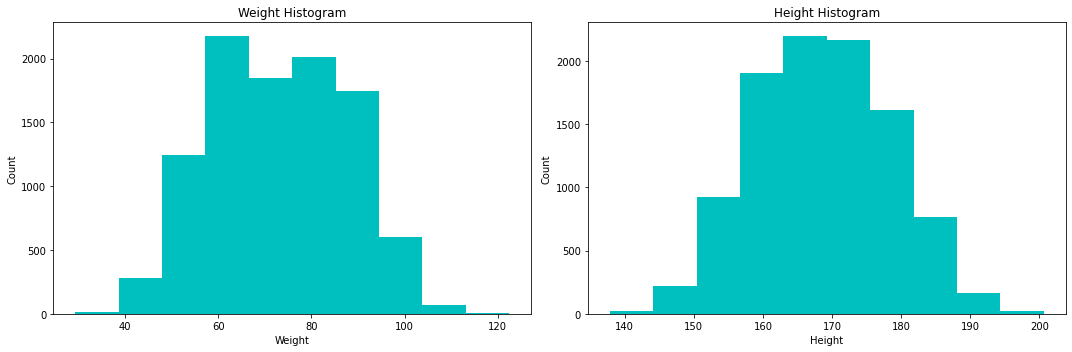

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax1, ax2 = ax
ax1.hist(x=data.Weight, color='c')
ax1.set_title("Weight Histogram")
ax1.set_xlabel("Weight")
ax1.set_ylabel("Count")

ax2.hist(x=data.Height, color='c')
ax2.set_title("Height Histogram")
ax2.set_xlabel("Height")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

<p style="line-height:1.75;font-size:16px">
Since our data has both males and females, it would be reasonable to assume that their weights and height have different distributions - let's see if we're correct.

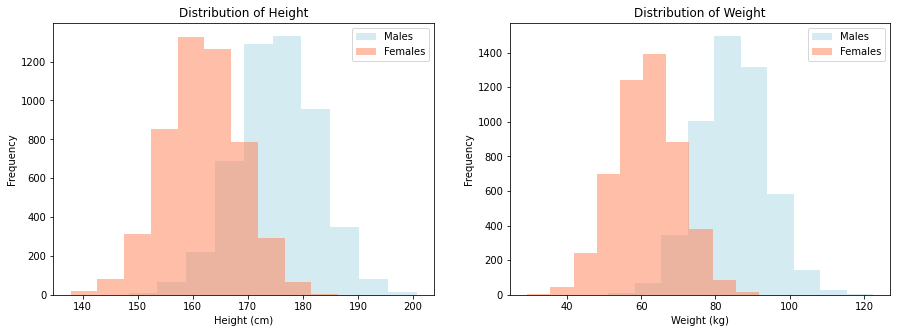

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax1, ax2 = ax

data[data.Gender == 'Male'].Height.plot(ax=ax1, kind='hist', color='lightblue', alpha=0.5)
data[data.Gender == 'Female'].Height.plot(ax=ax1, kind='hist', color='coral', alpha=0.5)
ax1.legend(labels=['Males', 'Females'])
ax1.set_title('Distribution of Height')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Frequency');

data[data.Gender == 'Male'].Weight.plot(ax=ax2, kind='hist', color='lightblue', alpha=0.5)
data[data.Gender == 'Female'].Weight.plot(ax=ax2, kind='hist', color='coral', alpha=0.5)
ax2.legend(labels=['Males', 'Females'])
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency');

<p style="line-height:1.75;font-size:16px">
Let's visualize the relationship between height and weight. This might also help us understand if we could apply linear regression on this data.

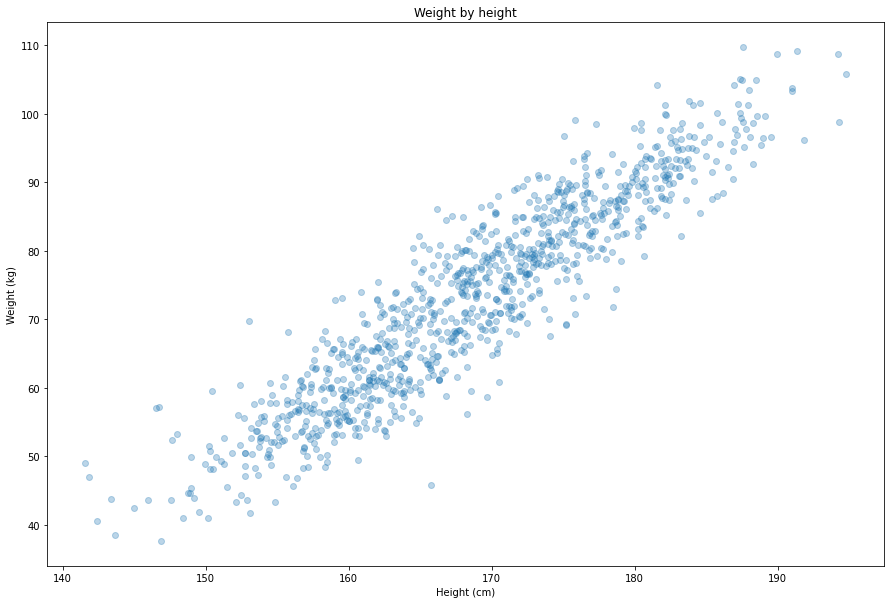

In [9]:
sample_df = data.sample(frac=0.10, random_state=42)

plt.figure(figsize=(15,10))
plt.scatter(x=sample_df.Height, y=sample_df.Weight, alpha=0.3)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight by height')
plt.show()

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Do you think linear regression will work well here? Why?
</p></div>

<p style="line-height:1.75;font-size:16px">
Let's see the same plot but this time we'll color the individual points according gender. This should give us more insight before we start building our model.

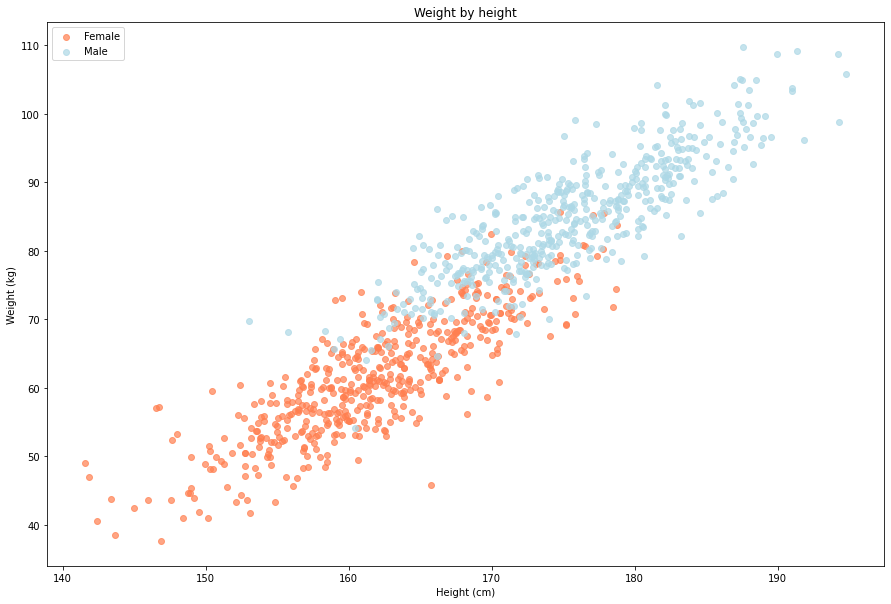

In [10]:
gender_color = sample_df.Gender.apply(lambda x: 'orange' if x=='Male' else 'skyblue')

fig = plt.figure(figsize=(15,10))
ax = fig.gca()

females = sample_df[sample_df.Gender == 'Female']
males = sample_df[sample_df.Gender == 'Male']

ax.scatter(x=females.Height, y=females.Weight, c='coral' , alpha=0.7, label='Female')
ax.scatter(x=males.Height, y=males.Weight, c='lightblue' , alpha=0.7, label='Male')

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_title('Weight by height')

plt.legend()
plt.show()

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Do you <b><u>still</u></b> think linear regression will work well here? Why?<br>
</p></div>

### 1.3.2. Creating a model

<p style="line-height:1.75;font-size:16px">
It's now time to create our model. In this phase, we try to find the best fitting line using the algorithm we talked about earlier. Luckily we don't have to implement the algorithm ourselves but rather use the `LinearRegression` model from `scikit-learn`.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Scikit-learn (Sklearn)</b></span><br>
Scikit-learn is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy. You will definitely be using sklearn as part of you work routine so it's a good idea to familiarize yourself with its capabilities and syntax. To read more about it head on to <a href=https://scikit-learn.org/>https://scikit-learn.org/</a> 
</p></div>

#### 1.3.2.1. Splitting the data

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Why do we need to split the data into subsets?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
When we fit (train) a model, we usually split the data first into subsets:
- <span style="line-height:1.75;font-size:16px">
<b>Train</b> - this is the main bulk of data which the model will use to adjust (learn) its parameters.
- <span style="line-height:1.75;font-size:16px"><b>Validation</b> - used to evaluate the model's performance on the train dataset while tweaking its hyperparmeters.
- <span style="line-height:1.75;font-size:16px"><b>Test</b> - used as an unbiased evaluation dataset for the <u>final</u> model.

<p style="line-height:1.75;font-size:16px">
Using only part of the data for training the model while evaluating it on test data that the model was not trained on, gives us an indication of how much <b>overfitting</b> or <b>underfitting</b> we should expect from the model.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 20 ,10

img_A = mpimg.imread('data.png')
img_B = mpimg.imread('overfit.png')
img_C = mpimg.imread('underfit.png')
img_D = mpimg.imread('correct_fit.png')

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img_A)
ax[0,0].set_title('Data')
ax[0,0].set_axis_off()

ax[1,0].imshow(img_B)
ax[1,0].set_title('Overfit')
ax[1,0].set_axis_off()

ax[0,1].imshow(img_C)
ax[0,1].set_title('Underfit')
ax[0,1].set_axis_off()

ax[1,1].imshow(img_D)
ax[1,1].set_title('Best Fit')
ax[1,1].set_axis_off()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.png'

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Train/Validation/Test Split</b></span><br>
Splitting the data into 3 subsets is very common when building machine learning models. Knowing when to split and how to split could greatly affect the results of your models so you should definitely read more about this topic: <a href=https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6>here</a> and <a href=https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/>here</a>.<br><br>

<span style="font-size:16px"><b>Overfitting/Underfitting</b></span><br>
Overfitting and underfitting are also terms that you'll come across a lot. In a nutshell, overfitting is a term used to describe the case where your model performs well on the data it was trained on but doesn't perform as well on new data is hasn't seen before (i.e. test set). Underfitting, on the other hand, is used to describe the scenario where the model performs poorly on the data it was trained on (and most likely on other data it hasn't seen before). This is usually due to insufficient training examples or lack of model complexity. You can read more about this topic <a href=https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690>here</a>.
</p>

</div>

<p style="line-height:1.75;font-size:16px">
Now that we've understood the importance of splitting the data let's write the code that does it. Since we're going to be using a simple linear regression model without tuning its hyperparameters, we only need to split the data into train and test with a 0.8/0.2 ratio (this is a common ratio but other ratios like 0.7/0.3 are also widely used - it depends on your data and the model you're trying to build).

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, train_size=0.8)

#### 1.3.2.2. Fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiating the model
lr = LinearRegression()

# Fit the model
lr.fit(train[['Height']], train[['Weight']])

#### 1.3.2.3. Evaluating the model

<p style="line-height:1.75;font-size:16px">
The model has now been fit to the data and we can evalute its results. We'll start by printing the intercept ($\beta_0$) and the coefficient ($\beta_1$).

In [ ]:
print(f'Intercept: {lr.intercept_}\nCoefficient: {lr.coef_}')

<p style="line-height:1.75;font-size:16px">
If we plug in these numbers into our original equation we'll get:<br>
<center><h3>
$y=-159.4 + 1.38x$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
So if, for instance, we have a person who's height is 175 cm we would use the equation and predict that his weight is 82.7 kg:
<center><h3>
$y=-159.4 + 1.38\cdot 175 = 82.7$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
We'll now plot the regression line on top of our data points to get a better visualization of the model's performance.

In [ ]:
sample_df = data.sample(frac=0.10, random_state=42)

# Calculate two points through which we'll draw the regression line
x1 = 140
x2 = 190
y1 = -159.4 + 1.38 * x1
y2 = -159.4 + 1.38 * x2

plt.figure(figsize=(15,10))
plt.scatter(x=sample_df.Height, y=sample_df.Weight, alpha=0.3)
plt.plot((x1, x2), (y1, y2), 'r-')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight by height')

plt.show()

<p style="line-height:1.75;font-size:16px">
It looks like our model fits the data pretty well! To get a better feel of how well, we could calculate a couple of other metrics.<br>
<b>Root Mean Square Error (RMSE)</b> is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.<br>
<center><h3>
$RMSE=\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n} (\hat y_i - y_i)^2}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
The <b>Coefficient of Determination ($R^2$)</b> is the proportion of the variance in the dependent variable that is predictable from the independent variable. $R^2$ will always yield a number between 0 and 1 where 0 means that none of the variation can be explained by the indepent variable and 1 means that all of the variation can be explained by it.
<center><h3>
$SS_{tot}=\sum\limits_{i=1}^{n} (\hat y_i - \bar y)^2$<p>
<center>
$SS_{res}=\sum\limits_{i=1}^{n} (\hat y_i - y_i)^2$<p>
<center>

$R^2=1 - \frac{SS_{res}}{SS_{tot}}$

</h3>
</center>

<p style="line-height:1.75;font-size:16px">
Let's calculate these values using Sklearn's built-in methods.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_true = train['Weight']
y_predicted = lr.predict(train[['Height']])
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
r_squared = r2_score(y_true, y_predicted)

print(f'The RMSE is: {rmse:.1f}. This means that, on average, our predictions are off by {rmse:.1f} kilograms')
print(f'The R-squared score is: {r_squared:.2f}. This means that {(r_squared * 100):.0f}% of the variation in weight can be explained by the height')

#### 1.3.2.4. Validating the model

<p style="line-height:1.75;font-size:16px">
Recall that earlier we split our data into train and test but until now we've only used the train data. We said that the test data is used to estimate the performance of our model on new data. To do this, we'll calculate the same metrics we've calculated in the previous step only this time we'll use the test data.

In [ ]:
y_true = test['Weight']
y_predicted = lr.predict(test[['Height']])
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
r_squared = r2_score(y_true, y_predicted)

print(f'The RMSE is: {rmse:.1f}. This means that, on average, our predictions are off by {rmse:.1f} kilograms')
print(f'The R-squared score is: {r_squared:.2f}. This means that {(r_squared * 100):.0f}% of the variation in weight can be explained by the height')

<p style="line-height:1.75;font-size:16px">
We're getting similar results for both the train and test data which is what we want. It means that there is no overfitting and that the model generalizes well.

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Train separate linear regression models for the male population and the female population. Report the following:<br>
1. Linear regression equation.<br>
2. RMSE and R2 values.<br>
3. Display a scatter plot showing the fitted regression line.<br>
Do these model perform better than the original one? Why? 
</p></div>

# 2. Multiple Linear Regression

<p style="line-height:1.75;font-size:16px">
Up until now we've used linear regression to build a simple model which yields a prediction (a person's weight) by using a single input variable (a person's height). However, for the most part, real life problems tend to be more complex and involve many more variables. For instance, when predicting someone's weight, besides using a person's height it might also be useful to know the person's gender, activity level and age for example - that's where multiple linear regression comes in. In the introduction we saw that multiple linear regression is simply a generalization of the linear regression equation:<br>
<center><h3>
$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
where $x_1, x_2, ..., x_n$ each represent a different variable used in the model (height, age, gender...). <br>
In this section we'll build a mutliple linear regression model using the <a href=https://www.kaggle.com/camnugent/california-housing-prices>California housing prices dataset</a> from Kaggle. This dataset has contains housing information such as population, median income, total rooms and median house value - aggregated by blocks. Our goal will be to predict the median house value using the other available variables.

In [ ]:
housing_df = pd.read_csv('housing.csv')
housing_df.dropna(inplace=True)
housing_df.head()

<p style="line-height:1.75;font-size:16px">
We can use a pairplot to identify interesting relationships in our data

In [ ]:
import seaborn as sns

sns.pairplot(housing_df)

<div style="line-height:1.75;background:#990000;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-exclamation-triangle" style="font-size:40px;color:#ffb3b3;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffb3b3;padding:20px;border-radius:0px 0px 5px 5px">
Notice how some of the variables like number of rooms and number of bedrooms have a linear relationship meaning they are highly correlated. We refer to this as <b>multicollinearity</b> and it can be a serious issue when trying to build a multiple linear regression model. Understanding the effects of multicollinearity is beyond our scope but in essence it means that least squares (and other methods) will have a hard time understanding the effect of each single independent variable on the the dependant variable. This will lead to higher error rates and to evaluation metrics that we can't trust. You can read more about multicollinearity <a href=https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/>here</a>.
</p></div>

<p style="line-height:1.75;font-size:16px">
Before we start training our model, there's one issue we need to address. The `ocean_proximity` variable is a categorical variable which can't be used directly by a linear regression model. We'll have to translate it into something the model can work with.

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
How can we change our categorical variable so that the linear regression model will be able to use it?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
We'll use <b>dummy variables</b> to represent our categorical variable. A dummy variable is a boolean variable that represents one category in our categorical variable. For example, in our case, if a record has the value of 'Near Bay' in the categorical `ocean proximity` variable, then the dummy variable representing 'Near Bay' would be set to 1 and the rest of the dummy variables will be 0. In order to represent a categorical variable with 5 possible values we would need 4 dummy variables (why not 5?).

In [ ]:
housing_df = pd.get_dummies(housing_df)
housing_df.head()

<p style="line-height:1.75;font-size:16px">
By default, `get_dummies` will look for columns of type category or object and transform them into dummy variables. We can override this behaviour by specifying the columns we are interested in transforming.<br> We are now ready to build our model following the same steps we took earlier.

In [ ]:
# Split the data into train/test
housing_train, housing_test = train_test_split(housing_df, train_size=0.8)

# Instantiate the model
lr = LinearRegression()

# Fit the model
lr.fit(housing_train.drop(['median_house_value'], axis=1), housing_train[['median_house_value']])

print(f'Intercept: {lr.intercept_}\nCoefficients: {lr.coef_}')

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
Can you tell which variables are more important in our regression model? How?<br>
</p></div>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_true = housing_train['median_house_value']
y_predicted = lr.predict(housing_train.drop(['median_house_value'], axis=1))
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
r_squared = r2_score(y_true, y_predicted)

print(f'The RMSE is: {rmse:.1f}. This means that, on average, our predictions are off by ${rmse:.1f}')
print(f'The R-squared score is: {r_squared:.2f}. This means that {(r_squared * 100):.0f}% of the variation in weight can be explained by the independent variables')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_true = housing_test['median_house_value']
y_predicted = lr.predict(housing_test.drop(['median_house_value'], axis=1))
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
r_squared = r2_score(y_true, y_predicted)

print(f'The RMSE is: {rmse:.1f}. This means that, on average, our predictions are off by ${rmse:.1f}')
print(f'The R-squared score is: {r_squared:.2f}. This means that {(r_squared * 100):.0f}% of the variation in weight can be explained by the independent variables')

<p style="line-height:1.75;font-size:16px">
Since we are dealing with high-dimensional data, we can't plot it like we did for the simple linear regression model. However, we can still plot a somewhat useful visualization that will give us some indication of our model's performance.

In [ ]:
# Coordinates for drawing a straight line with a slope of 1
x1 = 0
x2 = 500000
y1 = 0
y2 = 500000

plt.figure(figsize=(15,10))
plt.scatter(x=y_true, y=y_predicted, alpha=0.3)
plt.plot((x1, x2), (y1, y2), 'r-')
plt.xlabel('Median House Value (True)')
plt.ylabel('Median House Value (Predicted)')
plt.title('Median House Value - True vs. Predicted')

plt.show()

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Train a multiple linear regression model on the weights dataset using the gender as another variable. Report the following:<br>
1. Linear regression equation.<br>
2. RMSE and R2 values.<br>
3. Display a scatter plot showing the predicted values vs. the actual values.<br>
How does this model compare to the simple linear regression models you've built earlier?
</p></div>

# 3. Regression Trees

## 3.1. Introduction

<p style="line-height:1.75;font-size:16px">
Up until now we've learned how to fit a linear regression model which relies on one major assumption: <b>each term is either a constant or the product of a parameter and a predictor variable</b>. So while we think of linear regression as being straight line that's not necessarily true since it can produce curves. For example, the following equations are all valid linear regression equations:
<center>
<h3>
$y=\beta_0 + \beta_1x_1 + \beta_2x_2$ <p>
<center>
$y=\beta_0 + \beta_1x_1^2 + \beta_2x_2$<p>
</center>
<center>
$y=\beta_0 + \beta_1x_1^2 + \beta_2x_2^3$
</center>
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
We can see that linear regression can produce complex curves in when fitting the data. However, in order for it to work, it must be linear in its parameters ($\beta_1, \beta_2, ...)$. For instance, the following equations are examples of non-linear regression:
<center>
<h3>
$y=\beta_1x_1^{\beta_2}$ <p>
<center>
$y=\beta_1\cos(x_1 + \beta_2)$<p>
</center>
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
There are various algorithms that can peform non-linear regression (there is even a non-linear version of least squares), but in this chapter we will focus on regression trees.

## 3.2. Regression Tree Overview

<p style="line-height:1.75;font-size:16px">
A regression tree builds the regression model in the form of a tree structure by breaking down the dataset into smaller subsets at each level. The decision tree contains two types of nodes: <br>
1. <span style="line-height:1.75;font-size:16px">
<b>Decision node</b> - A node that has a boolean criterion and two output child nodes (<i>if condition x then child 1 else child2</i>)<br>
2. <span style="line-height:1.75;font-size:16px"><b>Leaf node</b> - A final node which simply holds the samples that reached it by traversing the tree.

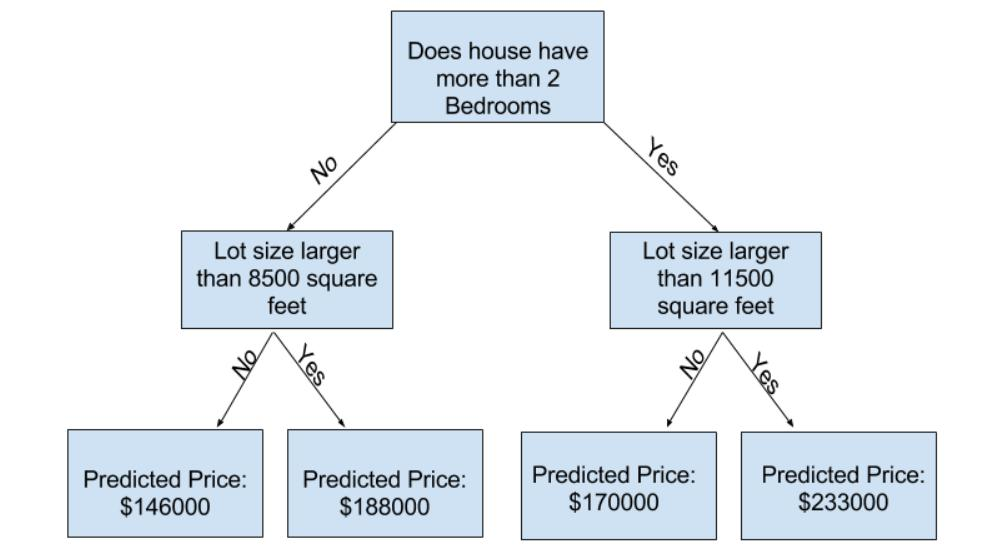

## 3.3. Regression Tree Example

<p style="line-height:1.75;font-size:16px">
In this example we'll use the <a href=https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset>tips dataset</a> from Kaggle. This dataset contains several features such as bill amount, gender of payer and size of party and the target variable which is the tip amount. We will train a regression tree on this data which will hopefully yield good predictions for the tip amount. 

### 3.3.1. Pre-Processing

In [ ]:
import pandas as pd

tips_df = pd.read_csv('data/tips.csv')
tips_df.head()

<p style="line-height:1.75;font-size:16px">
We'll need to encode the text variables as numbers in order for the algorithm to be able to handle them. The `sex` and `smoker` variables are pretty straightforward:

In [ ]:
tips_df['sex'] = tips_df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
tips_df['smoker'] = tips_df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)

<p style="line-height:1.75;font-size:16px">
Now let's look at the possible values for `day` and `time`:

In [ ]:
print(tips_df['day'].unique())
print(tips_df['time'].unique())

<p style="line-height:1.75;font-size:16px">
The time variable is, once again, pretty straightforward:

In [ ]:
tips_df['time'] = tips_df['time'].apply(lambda x: 1 if x == 'Dinner' else 0)

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
How would you encode the <i>day</i> variable?<br>
</p></div>

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Issues with categorical variables</b></span><br>
If we have a categorical variable with many levels (unique values) using dummy variables (i.e. one hot encoding) could hurt our tree's performance. This has to do with the way nodes are chosen when building the tree and is beyond the scope of this course. You can read more about this issue <a href=https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html>here.</a> 
</p></div>

<p style="line-height:1.75;font-size:16px">
For the purpose of this example, we'll simply drop the `day` variable.

In [ ]:
tips_df = tips_df.drop('day', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tips_df.drop('tip', axis=1), tips_df['tip'], train_size=0.8)

### 3.3.1. Training the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

### 3.3.2. Evaluation

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
train_r2 = r2_score(y_train, y_train_predicted)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
test_r2 = r2_score(y_test, y_test_predicted)

print(f'Train RMSE: {train_rmse}, Train R2: {train_r2}')
print(f'Test RMSE: {test_rmse}, Test R2: {test_r2}')

<p style="line-height:1.75;font-size:16px">
Notice how we got a RMSE of 0 for the training data? This basically means that our model makes no mistakes. Great right? Well, not really. If we look at the RMSE of the test data we immediately understand that the model suffers from overfitting. This is a pretty common issue when it comes to using tree models which are prone to overfitting due to their ability to learn the training data with high granularity. That's why it's crucial to tweak the hyperparameters of the model.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Hyperparameters</b></span><br>
A hyperparameter is a parameter whose value is used to control the learning process. In contrast to model parameters, which are automatically learned the data, hyperparameters are mostly set manually and help to estimate model parameters. Read more about parameters and hyperparameters <a href=https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/#:~:text=In%20summary%2C%20model%20parameters%20are,be%20set%20manually%20and%20tuned.>here.</a> 
</p></div>

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Play around with the following hyperparameters to try and get a better more generalized regression tree model:<br>
<i>max_depth</i><br>
<i>max_leaf_nodes</i><br>
<i>min_samples_leaf</i><br>
You can read about all of the different hyperparameters of DecisionTreeRegressors in the <a href=https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>documentation</a>.<br>
Create a visualization of the best tree you've managed to train.
</div>

## 3.4. Feature Importance

<p style="line-height:1.75;font-size:16px">
Looking at the visualization of the regression tree, we can see some variables are used more than others. This may indicate that these features are more important than other ones but what can we do with this information? We can use it for feature selection - which features should be used in the model. The `DecisionTreeRegressor` has a built-in method that returns the importance of each feature.

In [ ]:
for feature, importance in zip(X_train.columns, model.feature_importances_):
    print(f'{feature:11}: {importance:.3f}')

<p style="line-height:1.75;font-size:16px">
Unsuprisingly, the `total_bill` feature is the most important one when it comes to predicting the tip. 

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Feature Selection</b></span><br>
Feature selection is an important and common procedure when training machine learning models. It helps ensure that features with little or no predictive power aren't included in the model and that the model doesn't become overly complex. Read more about it <a href=https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/>here.</a> 
</p></div>

# 4. K-Nearest Neighbors Regression

## 4.1. Overview

<p style="line-height:1.75;font-size:16px">
The K-Nearest neighbors algorithm is an intuitive algorithm that is based on the idea that similar records are close to one another in space. 

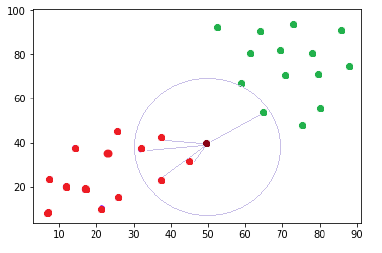

<p style="line-height:1.75;font-size:16px">
Here's a high-level overview of the K-Nearest neighbors regression algorithm:<br>
1\. <span style="line-height:1.75;font-size:16px">
For each data point, calculate its distance from all other data points.<br>
2\. <span style="line-height:1.75;font-size:16px">Choose the k nearest data points.<br>
3\. <span style="line-height:1.75;font-size:16px">Average the values of these neighbors.

## 4.2. K-Nearest Neighbors Regression Example 

<p style="line-height:1.75;font-size:16px">
We'll use the tips dataset again for this example

In [ ]:
import pandas as pd

tips_df = pd.read_csv('data/tips.csv')

tips_df['sex'] = tips_df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
tips_df['smoker'] = tips_df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
tips_df['time'] = tips_df['time'].apply(lambda x: 1 if x == 'Dinner' else 0)
tips_df = tips_df.drop('day', axis=1)
tips_df.head()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X, y)

<p style="line-height:1.75;font-size:16px">
In `sklearn's` implementation of the KNN algorithm, during the training process, a distance matrix is created, saving all of the distances between two data points along with a similarity matrix which stores the indices of the most similar data points. Let's take a look at it.

In [ ]:
distances, indices = model.kneighbors(X, return_distance=True)

In [ ]:
indices

In [ ]:
distances

<p style="line-height:1.75;font-size:16px">
Let's examine the first data point and its most similar neighbors:

In [ ]:
tips_df.loc[indices[0]]

<p style="line-height:1.75;font-size:16px">
Indeed it looks like these data points are pretty similar. Let's use the model to predict a value for a new entry.

In [ ]:
test_sample = pd.DataFrame({'total_bill': [12], 
                           'sex': [0], 
                           'smoker': [1], 
                           'time': [1], 
                           'size': [3]})
test_sample = test_sample[X.columns]  # Reorders the columns to match the model's input
test_sample.head()

In [ ]:
model.predict(test_sample)

<p style="line-height:1.75;font-size:16px">
Let's calculate the value for this test sample on our own to verify our model works correctly.

In [ ]:
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(X, test_sample).reshape(1,-1)
distances

In [ ]:
nearest_neighbors = np.argsort(distances)[0][:5]
nearest_neighbors

In [ ]:
neighbors_tips = y.loc[nearest_neighbors]
neighbors_tips

In [ ]:
neighbors_tips.mean()

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What would happen if we use <b>k=1</b>? What if we use a very large <b>k</b>?
</p></div>

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>Choosing a value for K</b></span><br>
Choosing the correct K value is can greatly affect the model's performance. In essence, we do this by trying various value of K and choosing the one which gives us the lowest error. You can read more about this issue <a href=https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb>here.</a> 
</p></div>

## 4.2. K-Nearest Neighbors Regressor Pros and Cons 

<p style="line-height:1.75;font-size:16px">
<b>Pros</b>
- Easy to understand and implement.
- Non-parametric - does not make any assumptions about the data.
<p style="line-height:1.75;font-size:16px">

<b>Cons</b>
- Computationally expensive.
- Suffers from skewed class distributions.
- Accuracy degrades with high-dimensional data.

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Train a KNN regressor on the housing dataset we used earlier to predict the median house value. Try several different values for k and plot the results.
</div>

# 5. Custom Regressor

<p style="line-height:1.75;font-size:16px">
Sometimes, we'd like our regressor to have a unique behavior. From processing the data further to using a custom loss function we want to be able to have more control over the inner-workings. Luckily, building our own regressor that conforms to sklearn's api is not very difficult - let's see how.<br>
We'll build a very simple regressor called MeanRegressor which ignores the input data and just returns the mean of the labels.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class MeanRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.mean_ = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean_])

<p style="line-height:1.75;font-size:16px">
If we test this on the housing data we'll see that this basic implementation already works

In [ ]:
df = pd.read_csv('data/housing.csv')
df.drop('ocean_proximity', axis=1, inplace=True)
df.dropna(inplace=True)

l = MeanRegressor()
l.fit(df.drop('median_house_value', axis=1), df['median_house_value'])
l.predict(df.drop('median_house_value', axis=1))

<p style="line-height:1.75;font-size:16px">
Since we are inheriting from `BaseEstimator` and `RegressorMixin` we can also use the `score` method.

In [ ]:
l.score(df.drop('median_house_value', axis=1), df['median_house_value'])

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:16px"><b>BaseEstimator and RegressorMixin</b></span><br>
The `BaseEstimator` is a base class for all estimators in scikit-learn which gives us the `fit` and `predict` functions. The `RegressorMixin` is a mixin class that gives us the score function. You can read more about them in  <a href=https://scikit-learn.org/stable/developers/develop.html>sklearn's documentation</a>.</p></div>

<p style="line-height:1.75;font-size:16px">
Let's make our regressor a bit more complicated by adding a hyperparameter c. If c is passed in the init then just return c else return the mean.

In [ ]:
class ConstantRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, c=None):
        self.c = c
        
    def fit(self, X, y):
        if self.c is None:
            self.const_ = y.mean()
        else:
            self.const_ = self.c
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.const_])

In [ ]:
r = ConstantRegressor()
r.fit(df.drop('median_house_value', axis=1), df['median_house_value'])
print(f"Without c: {r.predict(df.drop('median_house_value', axis=1))}")

l = ConstantRegressor(42)
l.fit(df.drop('median_house_value', axis=1), df['median_house_value'])
print(f"Without c: {l.predict(df.drop('median_house_value', axis=1))}")

<p style="line-height:1.75;font-size:16px">
Technically you could finish here and have a working regressor. However, in order to fully conform to sklearn there is some boilerplate code required.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class ConstantRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, c=None):
        self.c = c
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        if self.c is None:
            self.const_ = y.mean()
        else:
            self.const_ = self.c
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return np.array(X.shape[0]*[self.const_])

<p style="line-height:1.75;font-size:16px">
<b>check_X_y</b> checks X and y for consistent length, enforces X to be 2D and y 1D.<br>
<b>check_array</b> does input validation on an array, list, sparse matrix or similar.<br>
<b>check_is_fitted</b> checks if the estimator is fitted by verifying the presence of
fitted attributes (ending with a trailing underscore)

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Time to build your own custom regressor. Recall that for the height weight dataset you previously trained a different model for each gender. It would be nice however to have all of that logic built into one regressor. Build a custom regressor that fits a different model based on the person's gender (you can use an existing regressor such as linear regression for each gender). Then, in the predict function, your implementation should also use the correct trained regressor based again on the person's gender. You can also remove the boilerplate code if needed.
</div>